In [ ]:
import numpy as np
from theriapy.containers import TheriakContainer
from theriapy.batch_plot import batch_plot_stacked_volumes
%matplotlib inline

# Tested with Theriak-Domino v2025.06.05

# Bulk compositions
bulk0 = "SI(50.36)AL(30.54)FE(6.23)MG(2.46)CA(1.07)NA(4.62)K(4.73)O(?)H(2)"  # Metapelite TN205, De Capitani and Petrakakis 2010
bulk1 = "SI(65.44)AL(15.99)FE(4.97)MG(2.17)CA(4.25)NA(4.09)K(2.24)TI(0.78)O(?)H(6)"  # Random dacite
bulk2 = "SI(49.20)AL(16.70)FE(10.30)MG(5.40)CA(9.80)NA(3.10)K(0.70)TI(1.60)O(?)H(5)"  # Random basalt

# The database and theriak.ini files must be in the same folder as this script.
# Initialization (via pytheriak) requires:
# - the directory containing the Theriak-Domino executables
# - the database filename
# - the Theriak-Domino version
ther = TheriakContainer(programs_dir='C:/Program Files/TheriakDomino/2025/build/',
                        database='tcdb55c2d',
                        theriak_version='v2025.06.05'
                        )

# Number of steps along the P–T path
step_number = 15

# Pressure range: 4500–12000 bar
temps = np.linspace(520, 850, num=step_number).astype(int)

# Pressure graduating between 4500 and 8000 bars
press = np.linspace(4500, 12000, num=step_number).astype(int)

members_cfg = {
    "phen": ["PHNG_mu", "PHNG_pa", ],
    "bio": ["BIO_ann2", "BIO_obi", "BIO_east"],
    "chl": ["CHLR_daph", "CHLR_clin"],
    "opx": ["OPX_fm", "OPX_fs"],
    "omph": ["OMPH_di", "OMPH_jd", "OMPH_hed", "OMPH_om"],
    "pg": ["FSP_anc1", "FSP_abh"]
}

520 4500 : ['FSP_san', 'FSP_abh', 'GARNET_alm', 'BIO_obi', 'kyanite', 'quartz']
543 5035 : ['FSP_san', 'FSP_abh', 'GARNET_alm', 'BIO_ann2', 'kyanite', 'quartz']
567 5571 : ['FSP_san', 'FSP_abh', 'GARNET_alm', 'BIO_ann2', 'kyanite', 'quartz']
590 6107 : ['FSP_san', 'FSP_abh', 'GARNET_alm', 'BIO_ann2', 'kyanite', 'quartz']
614 6642 : ['FSP_san', 'FSP_abh', 'GARNET_alm', 'BIO_ann2', 'kyanite', 'quartz']
637 7178 : ['FSP_san', 'FSP_abh', 'GARNET_alm', 'BIO_ann2', 'kyanite', 'quartz']
661 7714 : ['FSP_san', 'FSP_abh', 'GARNET_alm', 'BIO_ann2', 'kyanite', 'quartz']
685 8250 : ['FSP_san', 'FSP_abh', 'GARNET_alm', 'BIO_ann2', 'kyanite', 'quartz']
708 8785 : ['FSP_san', 'FSP_abh', 'GARNET_alm', 'BIO_ann2', 'kyanite', 'quartz']
732 9321 : ['FSP_san', 'FSP_abh', 'GARNET_alm', 'PHNG_mu', 'BIO_ann2', 'kyanite', 'quartz']
755 9857 : ['FSP_san', 'FSP_abh', 'GARNET_alm', 'PHNG_mu', 'BIO_east', 'kyanite', 'quartz']
779 10392 : ['FSP_san', 'FSP_abh', 'GARNET_alm', 'kyanite', 'quartz']
802 10928 : ['FSP_

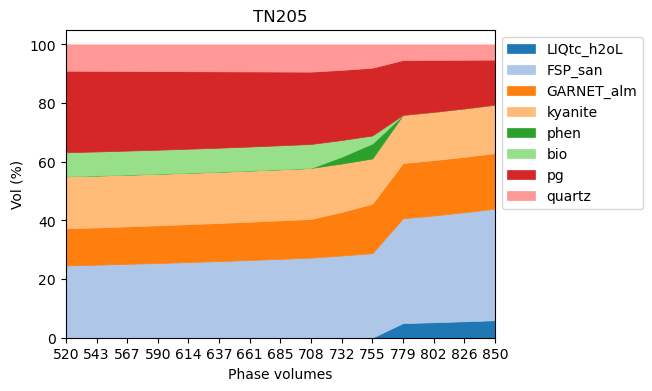

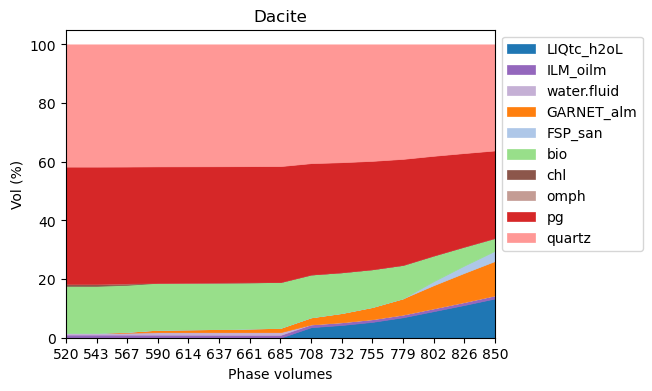

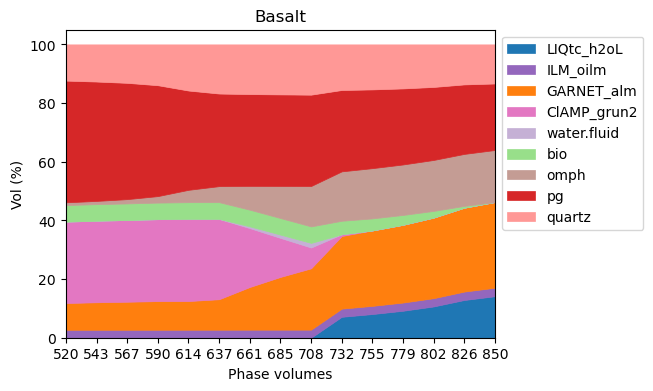

In [7]:
# Batch plot of phase volumes for multiple bulk compositions along the defined P–T path
batch_plot_stacked_volumes(ther,
                           bulks=[bulk0, bulk1, bulk2],
                           bulks_labels=["TN205", "Dacite", "Basalt"],
                           p_path=press, t_path=temps,
                           members_set=members_cfg,
                           normalize=True,
                           move_end_lists=[["pg", "quartz"]],
                           move_front_lists=[["LIQtc_h2oL"]]
                           )

P : 4500 , T : 520
Command : remove_sol LIQtc_
Phase not stable.
P : 5035 , T : 543
Command : remove_sol LIQtc_
Phase not stable.
P : 5571 , T : 567
Command : remove_sol LIQtc_
Phase not stable.
P : 6107 , T : 590
Command : remove_sol LIQtc_
Phase not stable.
P : 6642 , T : 614
Command : remove_sol LIQtc_
Phase not stable.
P : 7178 , T : 637
Command : remove_sol LIQtc_
Phase not stable.
P : 7714 , T : 661
Command : remove_sol LIQtc_
Phase not stable.
P : 8250 , T : 685
Command : remove_sol LIQtc_
Phase not stable.
P : 8785 , T : 708
Command : remove_sol LIQtc_
New bulk composition :  O(168.85275215)AL(15.6224564)CA(4.2306048)FE(4.9576747)H(3.85164245)K(2.1217763)MG(2.167416)NA(3.88550395)SI(63.78695535)TI(0.78)
P : 9321 , T : 732
Command : remove_sol LIQtc_
New bulk composition :  O(168.219976)AL(15.57487525)CA(4.22790035)FE(4.9558643)H(3.61243865)K(2.1033251)MG(2.16704455)NA(3.86252635)SI(63.578853699999996)TI(0.78)
P : 9857 , T : 755
Command : remove_sol LIQtc_
New bulk composition :

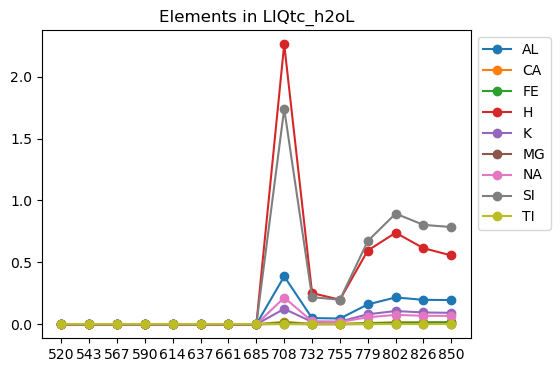

In [9]:
# Compute the P–T path for bulk1 and extract the 95 % of the LIQtc solution composition at each step.
# Command added: removes 95% of the LIQtc component at every step.
states = ther.compute_ruled_pt_path(pressures=press,
                                    temps=temps,
                                    bulk=bulk1,
                                    command="remove_sol LIQtc_ 95",
                                    is_fluid=True) # if the phase to add/remove is a fluid

# Plot the element budgets of the LIQtc_h2oL solution along the path (vs temperature)
states.set_members(members_cfg)
states.plot_path_phase_elts("LIQtc_h2oL",
                            valx=temps,
                            with_fluids=True) # if the phase to show is a fluid